#### Load the CSV into Pandas Dataframe

In [7]:
import pandas as pd
df = pd.read_excel("C:/Users/JOSH/Desktop/60 Days Challenge/Project 6/marketing_campaign_dataset.xlsx")

#### Inspect column names, null values, and data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  int64  
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 22.9+ MB


In [9]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,44197,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,44228,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,44256,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,44287,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,44317,379,4201,3,Health & Wellness


In [10]:
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

In [11]:
df.nunique()

Campaign_ID         200005
Company                  5
Campaign_Type            5
Target_Audience          5
Duration                 4
Channel_Used             6
Conversion_Rate         15
Acquisition_Cost     15001
ROI                    601
Location                 5
Date                   365
Clicks                 901
Impressions           9001
Engagement_Score        10
Customer_Segment         5
dtype: int64

### Data Cleaning and Preprocessing

In [12]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Standardize Strings
df['Company'] = df['Company'].str.strip().str.title()

In [14]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [15]:
# Outlier Detection using IQR
Q1 = df['Clicks'].quantile(0.25)
Q3 = df['Clicks'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Clicks'] < Q1 - 1.5 * IQR)) | (df['Clicks'] > (Q3 + 1.5 * IQR))]
print(IQR)

450.0


### Exploratory Data Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

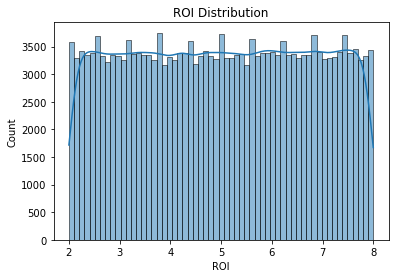

In [17]:
# ROI Distribution

sns.histplot(df['ROI'], kde=True)
plt.title("ROI Distribution")
plt.show()

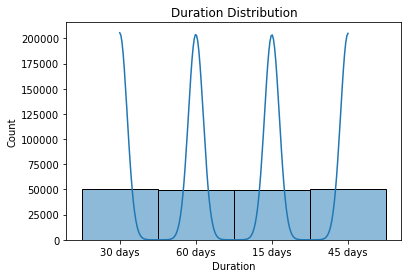

In [18]:
# Duration Distribution

sns.histplot(df['Duration'], kde=True)
plt.title("Duration Distribution")
plt.show()

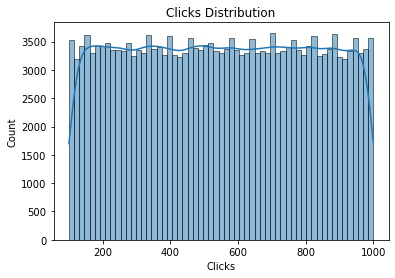

In [19]:
# Clicks Distribution

sns.histplot(df['Clicks'], kde=True)
plt.title("Clicks Distribution")
plt.show()

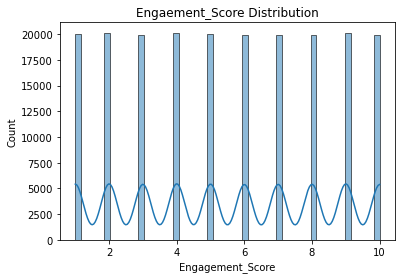

In [22]:
# Engagement Score Distribution

sns.histplot(df['Engagement_Score'], kde=True)
plt.title("Engaement_Score Distribution")
plt.show()

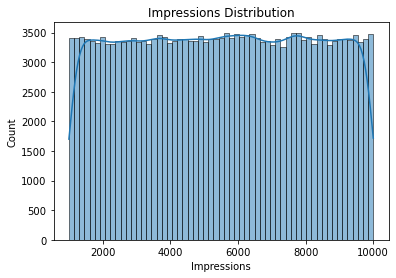

In [20]:
# Impression Distribution

sns.histplot(df['Impressions'], kde=True)
plt.title("Impressions Distribution")
plt.show()

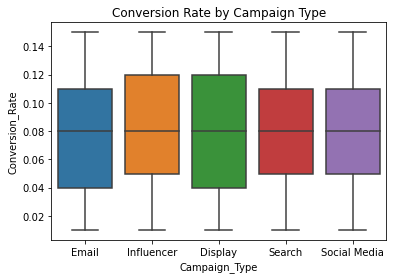

In [24]:
# Conversion Rate by Campaign Type

sns.boxplot(x='Campaign_Type', y='Conversion_Rate', data=df)
plt.title("Conversion Rate by Campaign Type")
plt.show()

### Campaign Performance Metrics

In [25]:
df['CTR'] = df['Clicks'] / df['Impressions']
df['CostPerClick'] = df['Acquisition_Cost'] / df['Clicks']
df['Profit'] = (df['ROI'] * df['Acquisition_Cost']) - df['Acquisition_Cost']


# Sort by Highest ROI
top_campaigns = df.sort_values(by='ROI', ascending=False).head(10)
print(top_campaigns)

        Campaign_ID             Company Campaign_Type Target_Audience  \
182656       182657   Alpha Innovations        Search       Men 18-24   
83445         83446   Alpha Innovations        Search     Women 35-44   
73036         73037      Nexgen Systems         Email       Men 18-24   
140372       140373  Datatech Solutions    Influencer        All Ages   
104050       104051   Alpha Innovations       Display       Men 25-34   
3231           3232   Alpha Innovations       Display     Women 25-34   
132599       132600            Techcorp    Influencer     Women 35-44   
119321       119322      Nexgen Systems        Search       Men 18-24   
50501         50502  Datatech Solutions  Social Media     Women 35-44   
98646         98647            Techcorp        Search       Men 25-34   

       Duration Channel_Used  Conversion_Rate  Acquisition_Cost  ROI  \
182656  60 days     Facebook             0.03             19250  8.0   
83445   15 days        Email             0.04       

### Channel, Audience & Segment Insights

In [26]:
channel_perf = df.groupby('Channel_Used')[['Conversion_Rate', 'Engagement_Score', 'Acquisition_Cost']].mean().reset_index()

print(channel_perf)

  Channel_Used  Conversion_Rate  Engagement_Score  Acquisition_Cost
0        Email         0.080282          5.487842      12526.387809
1     Facebook         0.079990          5.503748      12510.768617
2   Google Ads         0.080181          5.493989      12528.245036
3    Instagram         0.079886          5.489039      12491.760002
4      Website         0.080182          5.508828      12487.842001
5      YouTube         0.079890          5.484802      12481.570688


In [27]:
segment_perf = df.groupby(['Customer_Segment', 'Campaign_Type'])[['ROI', 'Conversion_Rate']].mean().reset_index()
print(segment_perf)

       Customer_Segment Campaign_Type       ROI  Conversion_Rate
0          Fashionistas       Display  5.010629         0.080438
1          Fashionistas         Email  5.017613         0.078997
2          Fashionistas    Influencer  4.999372         0.080138
3          Fashionistas        Search  4.991934         0.079619
4          Fashionistas  Social Media  4.985792         0.079778
5               Foodies       Display  5.020454         0.080068
6               Foodies         Email  4.999942         0.079950
7               Foodies    Influencer  5.016447         0.079968
8               Foodies        Search  5.007132         0.080229
9               Foodies  Social Media  4.976968         0.081078
10    Health & Wellness       Display  4.993587         0.080515
11    Health & Wellness         Email  4.990531         0.079283
12    Health & Wellness    Influencer  5.008931         0.080068
13    Health & Wellness        Search  5.027652         0.080081
14    Health & Wellness  

### Time & Location Trends

In [28]:
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.isocalendar().week

In [29]:
monthly_trend = df.groupby('Month')[['ROI', 'Conversion_Rate']].mean()
print(monthly_trend)

              ROI  Conversion_Rate
Month                             
1970-01  5.002416         0.080069


In [30]:
location_perf = df.groupby('Location')[['ROI', 'Conversion_Rate', 'Engagement_Score']].mean()
print(location_perf)

                  ROI  Conversion_Rate  Engagement_Score
Location                                                
Chicago      5.001555         0.080131          5.505061
Houston      5.007174         0.079949          5.514578
Los Angeles  5.010876         0.080013          5.488823
Miami        5.012282         0.080047          5.495766
New York     4.980185         0.080203          5.469257


### Correlation & Feature Relationships

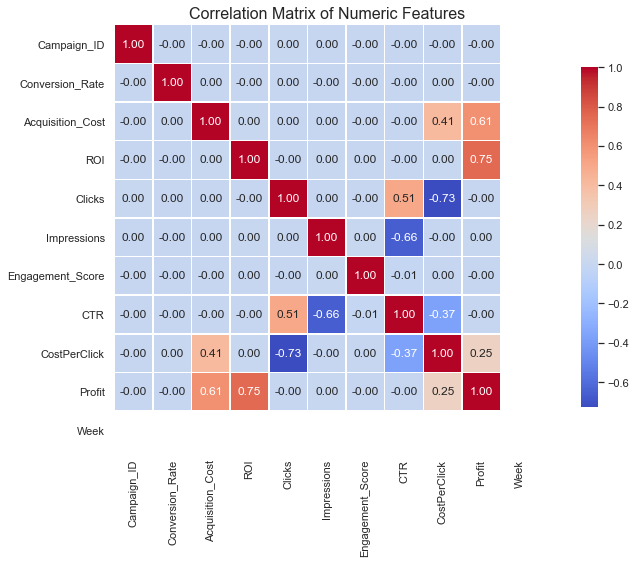

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

### Grouped & Segmented KPI Insights

In [32]:
pivot = df.pivot_table(values='ROI', index='Customer_Segment', columns='Campaign_Type', aggfunc='mean')
print(pivot)

Campaign_Type         Display     Email  Influencer    Search  Social Media
Customer_Segment                                                           
Fashionistas         5.010629  5.017613    4.999372  4.991934      4.985792
Foodies              5.020454  4.999942    5.016447  5.007132      4.976968
Health & Wellness    4.993587  4.990531    5.008931  5.027652      4.994954
Outdoor Adventurers  5.016483  4.962716    5.000002  5.013732      5.004172
Tech Enthusiasts     4.990761  5.001103    5.030037  5.001296      4.997202


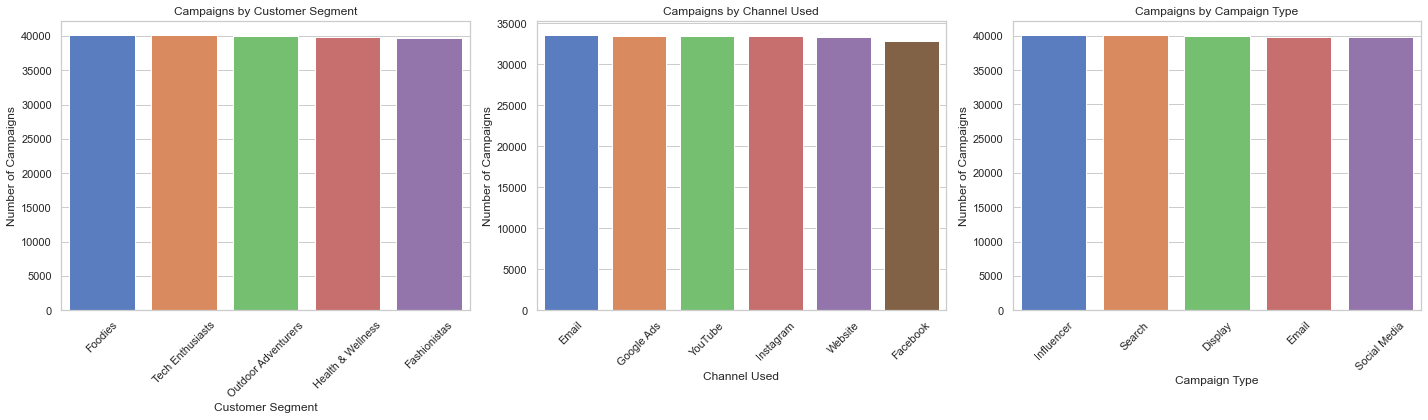

In [35]:
# Set Seaborn Theme
sns.set(style="whitegrid", palette="muted")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 1. Bar Chart: Campaign Count by Customer Segement
sns.countplot(data=df, x='Customer_Segment', 
              order=df['Customer_Segment'].value_counts().index, ax=axs[0])
axs[0].set_title('Campaigns by Customer Segment')
axs[0].set_xlabel('Customer Segment')
axs[0].set_ylabel('Number of Campaigns')
axs[0].tick_params(axis='x', rotation=45)

# 2. Bar Chart: Campaign Count by Channel Used
sns.countplot(data=df, x='Channel_Used', 
              order=df['Channel_Used'].value_counts().index, ax=axs[1])
axs[1].set_title('Campaigns by Channel Used')
axs[1].set_xlabel('Channel Used')
axs[1].set_ylabel('Number of Campaigns')
axs[1].tick_params(axis='x', rotation=45)

# 3. Bar Chart: Campaign Count by Campaign Type
sns.countplot(data=df, x='Campaign_Type', 
              order=df['Campaign_Type'].value_counts().index, ax=axs[2])
axs[2].set_title('Campaigns by Campaign Type')
axs[2].set_xlabel('Campaign Type')
axs[2].set_ylabel('Number of Campaigns')
axs[2].tick_params(axis='x', rotation=45)

# Adjust Layout
plt.tight_layout()
plt.show()

In [57]:
df.to_csv('Marketing Campaign.csv', index=False)